# Visualización de datos


## Visualización en Pandas y Matplotlib
En esta práctica utilizaremos el archivo "enigh_2020" que incluye las variables principales de la ENIGH 2020 (Encuesta Nacional de Ingreso y Gasto en Hogares) con observaciones de los principales municipios de la zona metropolitana de Monterrey. 

In [1]:
# Importar la biblioteca de pandas
import pandas as pd

In [2]:
# Cargar el archivo 'enigh2020.xlsx'
#df = pd.read_excel('../datasets/enigh2020.xlsx')
url = 'https://github.com/adan-rs/AnalisisDatos/raw/main/datasets/enigh2020.xlsx'
columns = ['folioviv', 'ubica_geo', 'est_socio', 'clase_hog', 'sexo_jefe',
           'edad_jefe', 'educa_jefe', 'tot_integ', 'hombres', 'mujeres',
           'ing_cor', 'gasto_mon']
df = pd.read_excel(url, usecols=columns)

In [3]:
# Revisar las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    2332 non-null   int64  
 1   ubica_geo   2332 non-null   object 
 2   est_socio   2332 non-null   object 
 3   clase_hog   2332 non-null   object 
 4   sexo_jefe   2332 non-null   object 
 5   edad_jefe   2332 non-null   int64  
 6   educa_jefe  2332 non-null   int64  
 7   tot_integ   2332 non-null   int64  
 8   hombres     2332 non-null   int64  
 9   mujeres     2332 non-null   int64  
 10  ing_cor     2332 non-null   float64
 11  gasto_mon   2332 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 218.8+ KB


In [4]:
# Eliminar valores atípicos
from sklearn.ensemble import IsolationForest

def remove_outliers_iso_forest(df, columns, contamination=0.05, random_state=42):
    """
    Elimina valores atípicos utilizando el algoritmo Isolation Forest.
    Retorna DataFrame sin valores atípicos.
    """
    # Initialize and fit Isolation Forest model
    iso_forest = IsolationForest(contamination=contamination, random_state=random_state)
    iso_forest.fit(df[columns])
    
    # Predict labels: 1 (normal) or -1 (outlier)
    labels = iso_forest.predict(df[columns])
    
    # Calculate and display number of excluded outliers
    df_clean = df[labels == 1]
    excluded_values = len(df) - len(df_clean)
    print(f"\nCantidad de valores atípicos excluidos: {excluded_values}")
    return df_clean

df = remove_outliers_iso_forest(df, columns=['ing_cor', 'gasto_mon'])


Cantidad de valores atípicos excluidos: 117


**Tabla de frecuencias**: Seleccionemos una columna con una variable categórica. Por ejemplo, el sexo del jefe de familia ('sexo_jefe'). Para hacer un diagrama de pastel o de barras necesitamos tener las categorías en un índice y sus frecuencias respectivas. A partir de los datos originales, una opción rápida es obtener un conteo de la frecuencia en cada categoría con `df['X'].value_counts()`

In [5]:
# Obtener el conteo de la variable 'sexo_jefe'
frecuencias = df['sexo_jefe'].value_counts()

Si la tabla de frecuencias ya está en un DataFrame hay que seleccionar el índice y la columna de valores. Por ejemplo, si tenemos un dataframe con las columnas "sexo_jefe" y "count". 
```
frecuencias = df['sexo_jefe'].value_counts() #Obtener frecuencias
frecuencias = frecuencias.reset_index()  #Convertir en dataframe solo para ejemplo
frecuencias.set_index('sexo_jefe')['count'].plot.pie();
```

**Diagramas de pastel** Los dataframes en Pandas tienen un método *plot* que permite crear fácilmente un gráfico. Por ejemplo, para una variable categórica "X", podemos crear un diagrama de pastel (pie) con `plot.pie()`

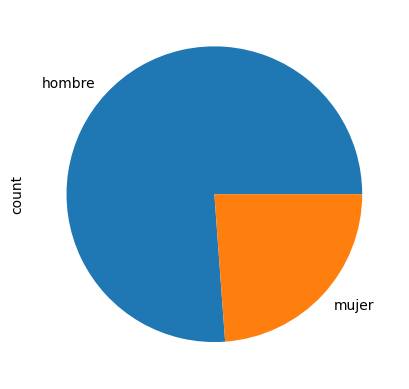

In [6]:
# Crear un gráfico de pastel
frecuencias.plot.pie();

Observa que aparece un texto antes del gráfico relacionada con el comando utilizado. Para evitar esto, repite el comando agregando un punto y coma al final.

Algunos parámetros importantes son `figsize`para establecer el tamaño del gráfico, `'title'` para agregar un título al gráfico, y `autopct='%1.1f%%'` para mostrar los valores con un decimal. Por ejemplo:

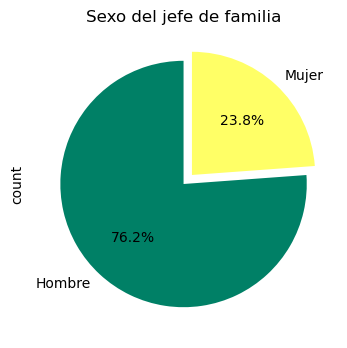

In [7]:
# Crear gráfico de pastel
frecuencias.plot.pie(figsize=(4,4),      # Establecer tamaño del gráfico        
                     title='Sexo del jefe de familia',   #Título
                     autopct='%1.1f%%',  # Mostrar los valores con un decimal
                     colormap='summer',  # Paleta automática de colores
                     startangle=90,      # Angulo inicial para la primera sección
                     explode=[0, 0.1],   # Lista para desplazar secciones hacia afuera
                     labels=['Hombre', 'Mujer']
                    );

Para ver las opciones de `colormap` consulta la página https://matplotlib.org/stable/users/explain/colors/colormaps.html 

**Diagramas de barra** Otra opción para variables categóricas son los diagramas de barra. Para ello se puede utilizar `plot.bar()` si deseas un gráfico vertical o `.plot.barh()` si deseas un gráfico horizontal.

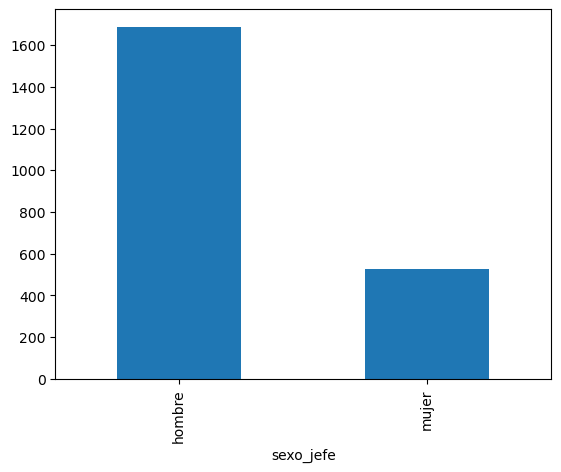

In [8]:
# Crea un gráfico de barras
df['sexo_jefe'].value_counts().plot.bar();

Existen algunos parámetros para modificar la apariencia del gráfico. Por ejemplo *width* indica la proporción de espacio que ocupan las barras, que dede manera predeterminada es 0.5 (*¿por qué es importante dejar un hueco entre las barras?*). El parámetro *alpha* sirve para agregar un nivel de transparencia desde completamente transparente (0) hasta completamente opaco (1). Con *color* podemos establecer una lista de colores codificados como `color=['red', 'blue']` o `color=['b', 'r']`

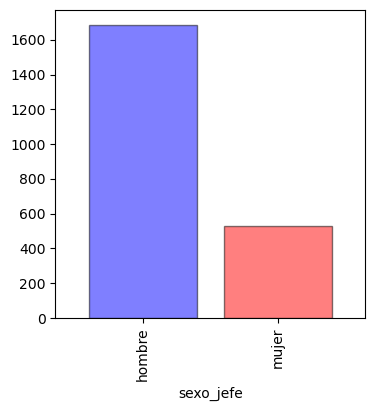

In [9]:
# Crear un gráfico de barras utilizando parámetros
frecuencias.plot.bar(figsize=(4,4),  
                     width = 0.80,    # Proporción de espacio que ocupan las barras, default = 0.5
                     alpha = 0.5,     # Transparencia, 0: transparente, 1: completamente opaco
                     color = ['b', 'r'],  # Lista de colores codificados como 'blue' o 'b'
                     align='center',   # Alienación: "center" o "edge"
                     edgecolor='black'
                    );

Para ejemplificar gráficos más complejos utilizaremos como referencia una tabla cruzada a partir de una tabla pivote. Crearemos esta tabla con la instrucción `tabla = df.pivot_table(index='ubica_geo', columns='sexo_jefe', values='tot_integ', aggfunc='sum')`. Las filas serán los diferentes municipios, las columnas el sexo del jefe de familia y los valores dentro de la tabla serán la suma de cada combinación de nombre y categoría

In [10]:
# Crear tabla pivote
tabla = df.pivot_table(index='ubica_geo', columns='sexo_jefe', values='tot_integ', aggfunc='sum')
tabla

sexo_jefe,hombre,mujer
ubica_geo,,
Apodaca,719,185
Cadereyta,516,90
Escobedo,933,190
Garcia,386,57
Guadalupe,653,200
Juarez,625,152
Monterrey,775,241
Pesqueria,365,81
San_Nicolas,440,158


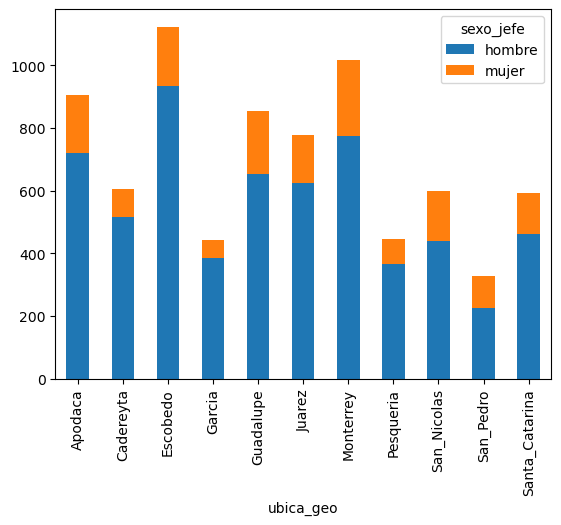

In [11]:
# Construye un gráfico de barras para "tabla". Modifica y agrega el parámetro 'stacked=True'
tabla.plot.bar(stacked = True);

Si nos interesa mostrar más de un gráfico se utiliza el parámetro *subplots=True*

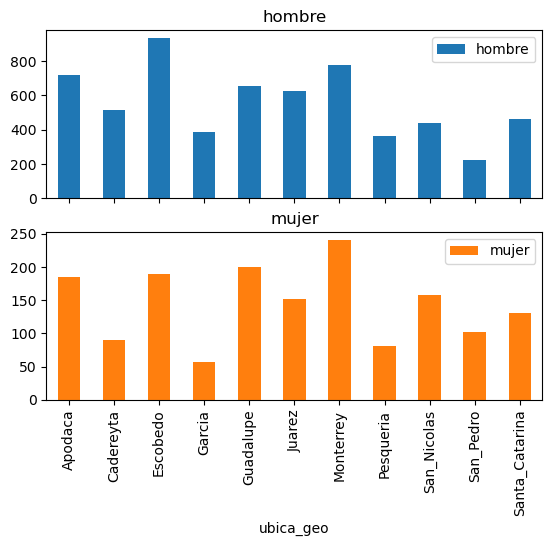

In [12]:
# Construye gráficos de barras para tablas utilizando subplots=True
tabla.plot.bar(subplots = True);

**Diagrama de dispersión**: Otro gráfico disponible es *'scatter'* para los diagramas de dispersión. Por ejemplo:  
`df.plot.scatter(x='ing_cor', y='gasto_mon')` 

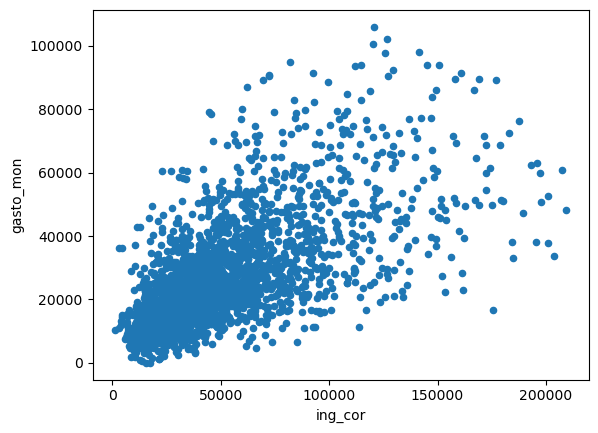

In [13]:
# Crear un diagrama de dispersión
df.plot.scatter(x='ing_cor', y='gasto_mon');

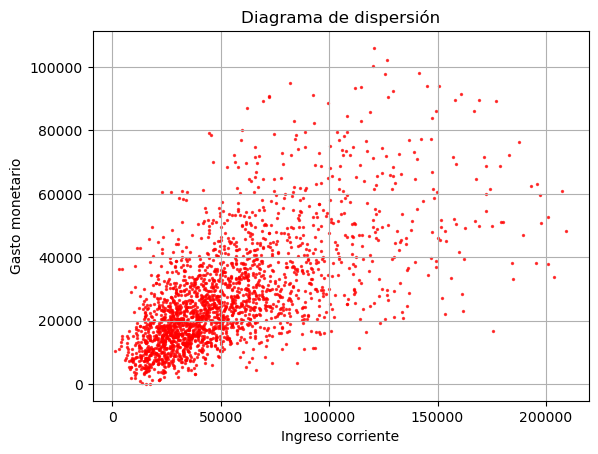

In [14]:
# Crear un diagrama de dispersión
df.plot.scatter(x='ing_cor', y='gasto_mon',
                title='Diagrama de dispersión', # Título del gráfico
                s=2,         # Tamaño de los puntos
                c='red',     # Color de los puntos
                alpha=0.7,   # Transparencia
                grid=True,    # Cuadrícula
                xlabel='Ingreso corriente',
                ylabel='Gasto monetario'
               );

**Histograma**

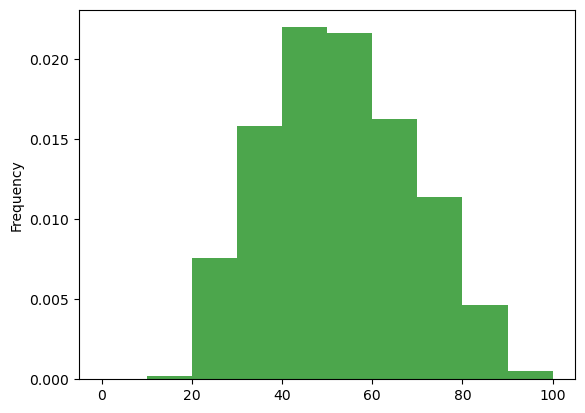

In [15]:
df['edad_jefe'].plot.hist(bins=10,  # Número de divisiones
                          range=(0,100), # Límite inferior y superior
                          alpha=0.7,   # Transparencia
                          color='green',
                          density=True  #Normaliza para que el área sea 1
                         );

**Diagrama de caja**

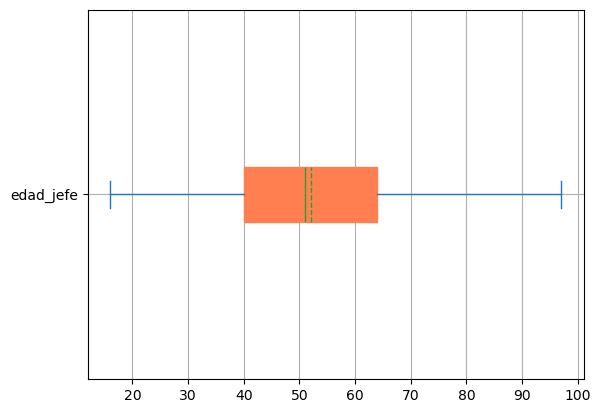

In [16]:
df['edad_jefe'].plot.box(vert=False,        # Orientación
                         grid=True,         # Cuadrícula
                         patch_artist=True, # Rellena el boxplot con color
                         color={'boxes':'coral'},   # Diccionario para colores de elementos
                         showmeans=True,    # Muestra la media
                         meanline=True,     # Si showmeans=True muestra media como línea
                         showfliers=True    # Si False, oculta outliers
                        );

## Gráficos con Seaborn
Para realizar gráficos más complejos es necesario utilizar otros paquetes como *Seaborn*. La estructura general de una función en Seaborn es `sns.plotClass(x=Xvar, y=Yvar, data=data, kind=kind, options)` en la cual sns es el alias de Seaborn, *plotClass* es una familia de gráficos.  
Tanto Pandas como Seaborn están construidas con el paquete *Matplotlib* interactuando con el módulo *pyplot*. Por lo tanto, se requiere importar el módulo *pyplot* aunque no lo utilices directamente. Para importarlo utiliza `import matplotlib.pyplot as plt`

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## Diagrama de dispersión

Para un diagrama de dispersión se puede utilizar la función `sns.scatterplot()`.

El parámetro "hue" sirve para colorear los puntos de acuerdo a una categoría. El parámetro "palette" se utiliza para agregar una paleta de colores.

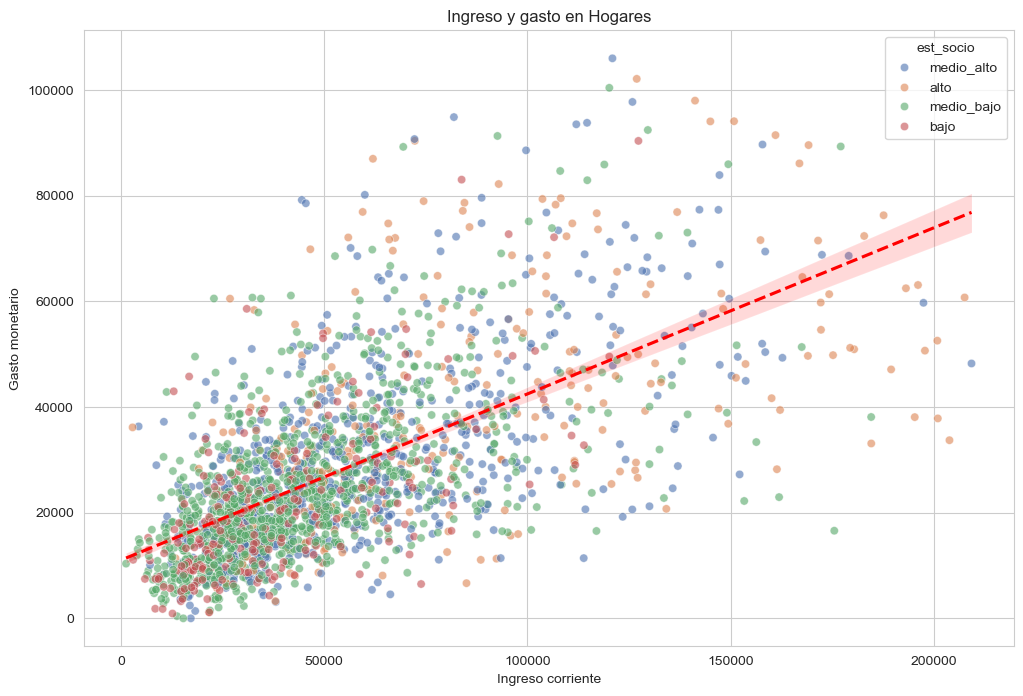

In [18]:
# Ejemplo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=df,
                          x='ing_cor',
                          y='gasto_mon',
                          hue='est_socio',          # Color según categoría
                          alpha=0.6,               # Transparencia
                          palette='deep',          # Paleta de colores
                          legend='full',           # Mostrar leyenda completa
                          )       
sns.regplot(data=df,                 # Agrega linea de tendencia
            x='ing_cor',
            y='gasto_mon',
            scatter=False,           # No mostrar puntos adicionales
            color='red',
            line_kws={'linestyle': '--'})

plt.title('Ingreso y gasto en Hogares')
plt.xlabel('Ingreso corriente')
plt.ylabel('Gasto monetario')
plt.show()

## Diagrama de pastel

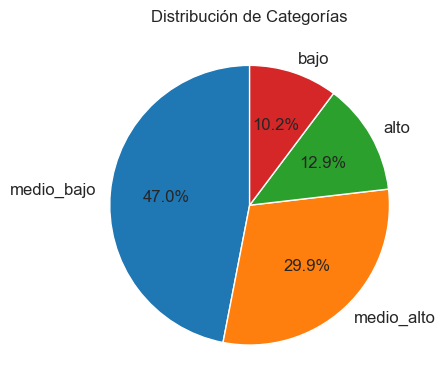

In [19]:
data = df['est_socio'].value_counts(ascending=False)

plt.figure(figsize=(6, 4)) # Tamaño específico

plt.pie(data.values,                     # Valores numéricos
        labels=data.index,              # Etiquetas para cada segmento
        autopct='%1.1f%%',             # Formato para mostrar porcentajes
        startangle=90,                 # Ángulo de inicio del primer segmento
        textprops={'fontsize': 12}     # Tamaño de fuente para las etiqueta
        )
plt.title('Distribución de Categorías')
plt.tight_layout()     # Ajuste del diseño
plt.show()     #Mostrar el gráfico

## Histograma

Un histograma se puede crear con *hist()*. El primer argumento es el conjunto de datos. Los *bins* corresponden a las barras.

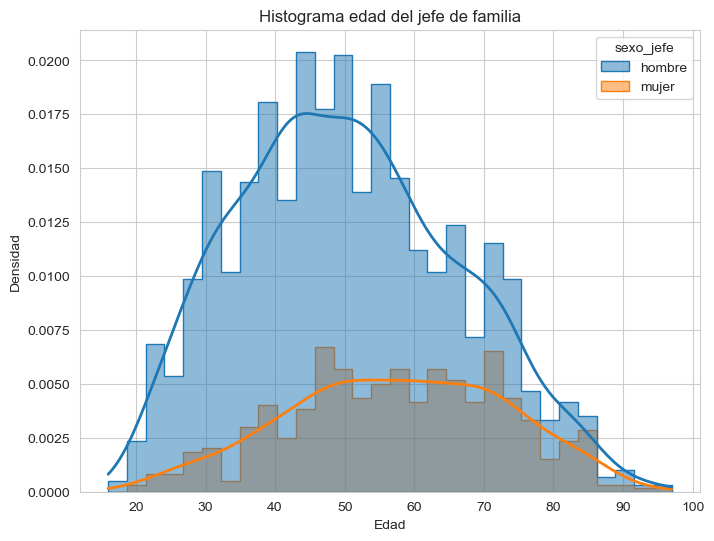

In [20]:
plt.figure(figsize=(8, 6))

hist = sns.histplot(
    data=df,
    x='edad_jefe',
    hue='sexo_jefe',              # Color según grupo
    multiple="layer",         # Superponer histogramas
    bins=30,                  # Número de bins
    alpha=0.5,               # Transparencia
    stat='density',          # Mostrar densidad en lugar de conteo
    element='step',          # Tipo de elemento (step, bars, poly)
    kde=True,                # Añadir estimación de densidad kernel
    line_kws={
        'linewidth': 2})

plt.title('Histograma edad del jefe de familia')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show();

## Diagrama de caja (boxplot)

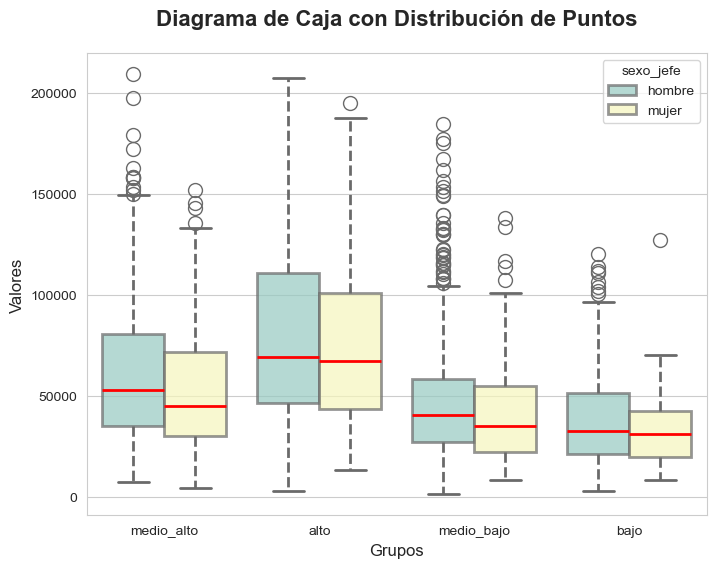

In [21]:
plt.figure(figsize=(8, 6))

box = sns.boxplot(data=df,
                  x='est_socio',
                  y='ing_cor',
                  hue='sexo_jefe',         # Separar por condición
                  palette='Set3',          # Paleta de colores
                  width=0.8,              # Ancho de las cajas
                  fliersize=10,           # Tamaño de los puntos atípicos
                  linewidth=2,            # Grosor de las líneas
                  notch=False,             # Añadir muescas si True
                  medianprops={           # Propiedades de la línea mediana
                      'color': 'red',
                      'linewidth': 2},
                  boxprops={              # Propiedades de las cajas
                      'alpha': 0.7},
                  whiskerprops={          # Propiedades de los bigotes
                      'linestyle': '--'})

plt.title('Diagrama de Caja con Distribución de Puntos', 
         pad=20, size=16, fontweight='bold')
plt.xlabel('Grupos', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.show();

En la terminología de Matplotlib, los gráficos se crean en un contenedor llamado figura (figure), y cada gráfico se organiza dentro de un área definida por uno o más ejes (axes). Puedes crear una figura con `fig = plt.figure()`, pero de manera predeterminada esta no contiene ningún eje. Los ejes se deben agregar explícitamente con el método `add_subplot()` o utilizando `plt.subplots()`. El método `plt.subplots()` crea una figura y un conjunto de ejes de manera más conveniente:  
- fig, ax = plt.subplots(nrows=1, ncols=1) crea una figura con un solo eje (1x1).  
- fig, axs = plt.subplots(nrows=2, ncols=2) crea una figura con un conjunto de 4 ejes dispuestos en una cuadrícula de 2x2. 

En Matplotlib, es común asignar nombres descriptivos como ax (para un solo eje) o axs (para conjunto de ejes)  


## Referencias
- Se pueden encontrar varios ejemplos de gráficos y códigos en: https://matplotlib.org/stable/gallery/index.html
- Documentación de Seaborn: https://seaborn.pydata.org/